# Import data

In [149]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import openpyxl
import scipy.optimize as minimizer 
import seaborn as sns 

In [109]:
# Import data from files
os.chdir('/Users/talhajamal/Desktop/Code/BigData1Project')
data = pd.read_csv("data/Returns_Data.csv")
data['date'] = pd.to_datetime(data['date'], dayfirst=False)
characteristics = pd.read_csv("data/Stock_Characteristics_Data.csv")
dictionary = pd.read_excel("data/StockDataDictionary.xlsx")

In [110]:
# Create new dataframes
prices = data.pivot(index='date', columns='ticker', values='PRC')
volume = data.pivot(index='date', columns='ticker', values='VOL')
returns = data.pivot(index='date', columns='ticker', values='RET')
returns = returns * 100 # Scale returns to percentage
# Summary of Returns
returns_summary = returns.describe()
shares_outstanding = data.pivot(index='date', columns='ticker', values='SHROUT')
value_weighted_returns = data.pivot(index='date', columns='ticker', values='vwretd')
equal_weighted_returns = data.pivot(index='date', columns='ticker', values='ewretd')
tickers = prices.columns # List of Tickers

# Data Preprocessing

In [111]:
# Cumulative Returns
returns.cumsum()

ticker,ADI,ADP,ADSK,AFL,AIZ,AMAT,AMP,APH,AXP,BBY,...,TRV,TSN,UNM,VFC,VLO,VZ,WAT,WY,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.2850,0.0234,1.0232,2.8541,2.3066,2.5825,2.7306,-0.5197,0.9872,1.8500,...,-0.1003,-0.2445,2.1516,0.1912,6.8060,0.4528,-0.5326,2.6426,9.8403,1.4078
2010-01-05,0.1271,-0.5136,-0.4961,5.7551,5.2907,1.8133,5.0626,-2.6094,0.7673,4.3879,...,-2.4693,1.6346,3.6060,2.0991,9.3773,0.6331,-1.8956,4.7655,15.9222,1.7983
2010-01-06,-0.0627,-0.7483,-0.2588,6.6335,5.0009,1.6019,6.4593,-2.2314,2.3838,3.6114,...,-3.8882,6.6867,4.4958,1.6979,11.8841,-2.2013,-1.7146,3.6598,14.6105,2.6626
2010-01-07,-0.8548,-0.7954,0.2937,7.7068,6.2279,0.5426,7.2084,-2.8959,3.9986,5.2010,...,-2.4489,8.4424,6.7006,3.6313,12.6284,-2.7965,-1.2877,3.2126,16.7461,2.3484
2010-01-08,-0.2799,-0.9366,3.3549,6.7050,6.2917,4.4113,7.5682,-2.1601,3.9271,1.2771,...,-2.5928,8.2173,5.3583,3.1044,11.2564,-2.7335,-1.2059,2.2917,16.0296,1.9472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,225.2769,209.1564,318.5352,134.8974,210.7661,266.2223,249.6355,215.6821,168.8371,215.7204,...,157.3226,228.5158,105.6305,230.4820,248.2550,132.9342,175.7468,164.4529,229.2066,21.8604
2020-12-28,225.4223,209.1847,317.9579,135.0799,211.3392,265.6832,249.7831,216.2008,169.6978,215.7497,...,157.8280,227.8830,106.4060,232.3294,247.1954,133.1721,175.7266,164.0393,230.1507,22.1969
2020-12-29,224.7173,208.1995,317.4440,134.6928,210.7019,264.9762,249.3041,215.1226,169.5119,213.9755,...,157.2245,226.5161,106.8587,231.5219,247.8489,132.8839,175.2530,162.9120,229.1461,21.0709


In [112]:
# Create correlation matrix
correlation_matrix = returns.corr()
correlation_matrix

ticker,ADI,ADP,ADSK,AFL,AIZ,AMAT,AMP,APH,AXP,BBY,...,TRV,TSN,UNM,VFC,VLO,VZ,WAT,WY,WYNN,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
ADI,1.000000,0.575610,0.552164,0.523202,0.462259,0.714050,0.596292,0.637304,0.546807,0.347137,...,0.483073,0.326923,0.517449,0.465644,0.437207,0.338292,0.495225,0.534595,0.464222,0.506499
ADP,0.575610,1.000000,0.528904,0.605848,0.540483,0.559727,0.655543,0.622024,0.616486,0.355851,...,0.624318,0.363147,0.581940,0.528556,0.489928,0.485502,0.553371,0.597151,0.416860,0.575303
ADSK,0.552164,0.528904,1.000000,0.463746,0.398231,0.552088,0.550950,0.568078,0.474242,0.314827,...,0.401518,0.288148,0.437308,0.434490,0.407097,0.283416,0.484981,0.470147,0.405759,0.404498
AFL,0.523202,0.605848,0.463746,1.000000,0.633143,0.490498,0.711044,0.608352,0.690189,0.346125,...,0.637511,0.412584,0.724434,0.548912,0.569525,0.408948,0.501116,0.598684,0.503274,0.619953
AIZ,0.462259,0.540483,0.398231,0.633143,1.000000,0.444370,0.623686,0.526663,0.547776,0.333194,...,0.655542,0.345027,0.618616,0.448169,0.448457,0.391155,0.429497,0.504014,0.376574,0.515368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VZ,0.338292,0.485502,0.283416,0.408948,0.391155,0.312622,0.429567,0.400548,0.384200,0.231419,...,0.456158,0.290179,0.382645,0.346429,0.310185,1.000000,0.360842,0.387749,0.228160,0.412483
WAT,0.495225,0.553371,0.484981,0.501116,0.429497,0.480138,0.552548,0.573233,0.509605,0.286880,...,0.455313,0.281526,0.479949,0.454820,0.426990,0.360842,1.000000,0.502558,0.381953,0.470176
WY,0.534595,0.597151,0.470147,0.598684,0.504014,0.506892,0.649698,0.584423,0.608739,0.371413,...,0.570950,0.358299,0.598621,0.524152,0.497598,0.387749,0.502558,1.000000,0.458862,0.571841


In [113]:
# Covariance Matrix
covariance_matrix = returns.cov()
covariance_matrix

ticker,ADI,ADP,ADSK,AFL,AIZ,AMAT,AMP,APH,AXP,BBY,...,TRV,TSN,UNM,VFC,VLO,VZ,WAT,WY,WYNN,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
ADI,3.262099,1.431482,2.258351,1.684421,1.371195,2.754325,2.335061,1.830164,1.806743,1.582277,...,1.230018,1.088972,2.044468,1.533855,1.971979,0.676519,1.468850,1.935924,2.466527,1.371915
ADP,1.431482,1.895913,1.649152,1.486982,1.222238,1.645976,1.957046,1.361792,1.552912,1.236547,...,1.211896,0.922177,1.752877,1.327340,1.684646,0.740185,1.251271,1.648574,1.688536,1.187972
ADSK,2.258351,1.649152,5.128014,1.871921,1.481065,2.670058,2.705062,2.045397,1.964669,1.799203,...,1.281829,1.203408,2.166338,1.794467,2.302181,0.710622,1.803537,2.134633,2.703053,1.373699
AFL,1.684421,1.486982,1.871921,3.177357,1.853532,1.867275,2.748022,1.724180,2.250687,1.557037,...,1.602031,1.356339,2.824852,1.784502,2.535201,0.807126,1.466890,2.139662,2.639058,1.657266
AIZ,1.371195,1.222238,1.481065,1.853532,2.697303,1.558646,2.220862,1.375284,1.645819,1.381003,...,1.517803,1.045060,2.222543,1.342421,1.839300,0.711301,1.158381,1.659673,1.819391,1.269354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VZ,0.676519,0.740185,0.710622,0.807126,0.711301,0.739261,1.031245,0.705162,0.778237,0.646654,...,0.712041,0.592556,0.926829,0.699577,0.857685,1.225971,0.656120,0.860807,0.743175,0.684932
WAT,1.468850,1.251271,1.803537,1.466890,1.158381,1.683953,1.967371,1.496761,1.530997,1.188938,...,1.054110,0.852644,1.724189,1.362220,1.751098,0.656120,2.696820,1.654728,1.845218,1.157943
WY,1.935924,1.648574,2.134633,2.139662,1.659673,2.170542,2.824339,1.863104,2.232854,1.879340,...,1.613849,1.324902,2.625611,1.916697,2.491496,0.860807,1.654728,4.020034,2.706502,1.719453


In [114]:
returns_summary

ticker,ADI,ADP,ADSK,AFL,AIZ,AMAT,AMP,APH,AXP,BBY,...,TRV,TSN,UNM,VFC,VLO,VZ,WAT,WY,WYNN,XOM
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,...,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000
mean,0.082171,0.075467,0.115515,0.049235,0.077092,0.096573,0.091032,0.078342,0.062060,0.076931,...,0.057306,0.082338,0.039803,0.083894,0.090240,0.047957,0.063519,0.059052,0.082285,0.007568
std,1.806128,1.376921,2.264512,1.782514,1.642347,2.135688,2.168156,1.589992,1.829424,2.523674,...,1.409776,1.844263,2.187580,1.823818,2.497278,1.107236,1.642200,2.005002,2.941788,1.499687
min,-16.614900,-15.252600,-15.859900,-16.431200,-19.736000,-20.357600,-23.822100,-13.831700,-14.818700,-28.586600,...,-20.800400,-14.489300,-22.368400,-12.921700,-19.220900,-6.620500,-12.313300,-22.673400,-24.434600,-12.224800
25%,-0.768800,-0.518300,-0.958600,-0.654700,-0.679300,-0.956700,-0.854800,-0.624000,-0.642600,-1.036300,...,-0.553600,-0.770300,-0.813000,-0.692300,-1.109900,-0.570000,-0.659100,-0.860100,-1.270700,-0.661600
50%,0.075900,0.094800,0.132600,0.092500,0.100900,0.079900,0.107700,0.087600,0.074100,0.098300,...,0.091300,0.137600,0.082800,0.091300,0.086200,0.066800,0.098800,0.069700,-0.009000,-0.011500
75%,0.974800,0.744600,1.220500,0.762600,0.885200,1.208300,1.087200,0.808900,0.864100,1.328900,...,0.708000,0.987300,1.032900,0.951000,1.325100,0.650300,0.832000,1.004100,1.371200,0.699600
max,14.697800,11.803600,16.198500,26.176600,14.148400,13.812200,22.635800,14.758600,21.882300,21.479600,...,13.290300,22.702600,26.204200,14.003000,31.202500,7.680200,12.692700,25.315500,27.688300,12.686800


In [115]:
annualized_mean_returns = returns.mean() * 252
annualized_mean_returns

ticker
ADI     20.707110
ADP     19.017709
ADSK    29.109750
AFL     12.407273
AIZ     19.427180
          ...    
VZ      12.085243
WAT     16.006814
WY      14.881151
WYNN    20.735841
XOM      1.907246
Length: 100, dtype: float64

In [116]:
annualized_std_dev = returns.std() * np.sqrt(252)
annualized_std_dev

ticker
ADI     28.671394
ADP     21.857950
ADSK    35.948012
AFL     28.296536
AIZ     26.071447
          ...    
VZ      17.576825
WAT     26.069115
WY      31.828424
WYNN    46.699441
XOM     23.806789
Length: 100, dtype: float64

# Portfolio Calculations

In [117]:
df_returns = returns.copy()
returns = returns.T 

In [121]:
def portfolio_return(weights, returns):
    return np.sum(np.mean(returns, axis=1) * weights) * 252

def portfolio_volatility(weights, returns):
    return np.sqrt(np.dot(weights.T, np.dot(np.cov(returns) * 252, weights)))

In [132]:
def sharpe_taget(weights, *args):
    # get the asset's returns 
    returns = args[0]

    #print(portfolio_return(weights, returns))
    #print(portfolio_volatility(weights, returns))
    return - portfolio_return(weights, returns) / portfolio_volatility(weights, returns)

In [133]:
cons = ({'type': 'eq', 
         'fun': lambda weights: np.sum(weights) - 1
         })

bounds = tuple((0, 1) for x in range(len(returns)))

In [134]:
equally_weighted_portfolio = np.array([1 / len(returns) for x in range(len(returns))])

In [135]:
sharpe_taget(equally_weighted_portfolio, returns)

-0.855625961255147

In [136]:
%%time
opts = minimizer.minimize(sharpe_taget, x0=equally_weighted_portfolio, args=returns, method="SLSQP", bounds=bounds, constraints=cons)

CPU times: user 29.7 s, sys: 2.04 s, total: 31.7 s
Wall time: 3.55 s


In [139]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.462405078312244
       x: [ 0.000e+00  8.181e-16 ...  0.000e+00  0.000e+00]
     nit: 11
     jac: [ 3.425e-01  2.774e-01 ...  5.054e-01  1.138e+00]
    nfev: 1113
    njev: 11

In [137]:
optimal_portfolio = opts['x']

In [140]:
def taget_fun(weights, *args):
    # get the asset's returns 
    returns = args[0]

    return portfolio_volatility(weights, returns)

# specify target level of return 
return_target = portfolio_return(equally_weighted_portfolio, returns)

# the first equality constraint makes sure that the weights of the single assets sum to 1 for the total portfolio
# the second constraint fixes the return level which the total portfolio should achieve
cons = ({'type': 'eq', 
         'fun': lambda x: np.sum(np.mean(returns, axis=1) * x) * 252 - return_target
         },
         {
         'type': 'eq', 
         'fun': lambda x: np.sum(x) - 1
         
         })

bounds = tuple((0, 1) for x in range(len(returns)))

equally_weighted_portfolio = np.array([1 / len(returns) for x in range(len(returns))])

In [141]:
%%time
opts = minimizer.minimize(taget_fun, x0=equally_weighted_portfolio, args=returns, method="SLSQP", bounds=bounds, constraints=cons)

CPU times: user 42.6 s, sys: 13 s, total: 55.6 s
Wall time: 6.12 s


In [142]:
min_var_portfolio = opts['x']
min_var_portfolio

array([1.34148724e-14, 5.84017068e-15, 5.95029074e-14, 8.52886068e-14,
       6.33527344e-14, 1.05705170e-13, 4.51091706e-13, 1.35413129e-14,
       3.85220657e-15, 1.59618672e-14, 5.06240563e-02, 5.20289233e-02,
       8.21926101e-15, 3.46854036e-14, 3.10221117e-02, 4.64475657e-14,
       2.88420690e-14, 1.64885874e-01, 3.62529793e-14, 4.73090075e-14,
       1.17873838e-01, 4.07366394e-14, 1.60770685e-14, 1.16037449e-14,
       4.30976784e-14, 1.98823387e-03, 1.22466203e-13, 5.34487359e-14,
       1.23702768e-02, 5.05908877e-14, 7.21844661e-14, 5.91717515e-14,
       5.06993510e-15, 4.82772118e-14, 7.52493298e-14, 8.56601209e-04,
       8.97970193e-15, 4.50298780e-15, 2.41792597e-13, 1.20298377e-13,
       7.95620153e-03, 2.12180855e-14, 5.26396758e-02, 1.94315486e-14,
       7.53059740e-15, 2.34132276e-13, 1.69284133e-13, 2.43002600e-14,
       7.67049102e-14, 3.71499546e-14, 6.26970223e-13, 8.27264163e-02,
       2.24817564e-02, 1.14217592e-13, 4.25398961e-14, 1.20423038e-13,
      

In [143]:
print('Allocation Optimal', optimal_portfolio)
print(portfolio_return(optimal_portfolio, returns))
print(portfolio_volatility(optimal_portfolio, returns))
print('Sharpe Ratio', -round(sharpe_taget(optimal_portfolio, returns), 2))

Allocation Optimal [0.00000000e+00 8.18054587e-16 0.00000000e+00 0.00000000e+00
 3.70902588e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.51527030e-15 2.74173028e-15
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.06940649e-15
 0.00000000e+00 1.20725793e-01 1.34137911e-15 4.32305897e-03
 2.23780720e-01 8.91824890e-03 1.35559052e-15 0.00000000e+00
 1.72775545e-15 6.13672417e-16 0.00000000e+00 2.32207189e-15
 2.92851622e-15 1.10598885e-15 2.33153949e-15 8.79769780e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.53516305e-15
 0.00000000e+00 4.27416541e-16 0.00000000e+00 0.00000000e+00
 2.14865842e-15 0.00000000e+00 9.38690965e-02 0.00000000e+00
 5.60176446e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.19515479e-15 7.37149811e-17 0.00000000e+00 2.70534786e-15
 7.31116806e-16 3.17653803e-16 1.64296291e-15 0.00000000e+00
 6.48259725e-02 1.76281594e-15 6.18696218e-02 0.00000000e+00
 1.41180228e-15 5.19904120e-16 0.00000000e+00 2.55429727e-15
 2.93

In [144]:
print('Allocation Trivial', equally_weighted_portfolio)
print(portfolio_return(equally_weighted_portfolio, returns))
print(portfolio_volatility(equally_weighted_portfolio, returns))
print('Sharpe Ratio', -round(sharpe_taget(equally_weighted_portfolio, returns), 2))

Allocation Trivial [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]
15.931604359696644
18.619823475582752
Sharpe Ratio 0.86


In [145]:
print('Minimal variance allocation given target return', min_var_portfolio)
print(portfolio_return(min_var_portfolio, returns))
print(portfolio_volatility(min_var_portfolio, returns))
print('Sharpe Ratio', -round(sharpe_taget(min_var_portfolio, returns), 2))

Minimal variance allocation given target return [1.34148724e-14 5.84017068e-15 5.95029074e-14 8.52886068e-14
 6.33527344e-14 1.05705170e-13 4.51091706e-13 1.35413129e-14
 3.85220657e-15 1.59618672e-14 5.06240563e-02 5.20289233e-02
 8.21926101e-15 3.46854036e-14 3.10221117e-02 4.64475657e-14
 2.88420690e-14 1.64885874e-01 3.62529793e-14 4.73090075e-14
 1.17873838e-01 4.07366394e-14 1.60770685e-14 1.16037449e-14
 4.30976784e-14 1.98823387e-03 1.22466203e-13 5.34487359e-14
 1.23702768e-02 5.05908877e-14 7.21844661e-14 5.91717515e-14
 5.06993510e-15 4.82772118e-14 7.52493298e-14 8.56601209e-04
 8.97970193e-15 4.50298780e-15 2.41792597e-13 1.20298377e-13
 7.95620153e-03 2.12180855e-14 5.26396758e-02 1.94315486e-14
 7.53059740e-15 2.34132276e-13 1.69284133e-13 2.43002600e-14
 7.67049102e-14 3.71499546e-14 6.26970223e-13 8.27264163e-02
 2.24817564e-02 1.14217592e-13 4.25398961e-14 1.20423038e-13
 5.70775640e-02 8.83407998e-14 3.32159327e-14 2.81845568e-13
 1.40216779e-13 7.64988105e-14 4.7555

In [146]:
# Plot performance of trivial portfolio vs optiaml portfolio
trivial_portfolio = equally_weighted_portfolio
markowitz_portfolio = optimal_portfolio
min_var_portfolio = min_var_portfolio  # unnecessary

df_performance = pd.DataFrame()

In [147]:
df_performance = pd.DataFrame()
df_performance_summary = pd.DataFrame()

for i, ticker in enumerate(df_returns):
    df_performance['Trivial' + str(ticker)] = trivial_portfolio[i] * df_returns[ticker]
    df_performance['Markowitz' + str(ticker)] = markowitz_portfolio[i] * df_returns[ticker]
    df_performance['Min Variance' + str(ticker)] = min_var_portfolio[i] * df_returns[ticker]

    if i == 0:
        df_performance_summary['Trivial'] = df_performance['Trivial' + str(ticker)].copy()
        df_performance_summary['Markowitz'] = df_performance['Markowitz' + str(ticker)].copy()
        df_performance_summary['Min Variance'] = df_performance['Min Variance' + str(ticker)].copy()
    else:
        df_performance_summary['Trivial'] = df_performance['Trivial' + str(ticker)] + df_performance_summary['Trivial'].copy()
        df_performance_summary['Markowitz'] = df_performance['Markowitz' + str(ticker)] + df_performance_summary['Markowitz'].copy()
        df_performance_summary['Min Variance'] = df_performance['Min Variance' + str(ticker)] + df_performance_summary['Min Variance'].copy()

df_performance_summary = df_performance_summary.cumsum()

/var/folders/z8/18vf272n36z6tx1xm5tv3qvw0000gn/T/ipykernel_30695/2219167502.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_performance['Markowitz' + str(ticker)] = markowitz_portfolio[i] * df_returns[ticker]
/var/folders/z8/18vf272n36z6tx1xm5tv3qvw0000gn/T/ipykernel_30695/2219167502.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_performance['Min Variance' + str(ticker)] = min_var_portfolio[i] * df_returns[ticker]
/var/folders/z8/18vf272n36z6tx1xm5tv3qvw0000gn/T/ipykernel_30695/2219167502.py:5: PerformanceWarning:

In [148]:
df_performance_summary

,Trivial,Markowitz,Min Variance
date,,,
2010-01-04,1.424721,0.324932,0.481952
2010-01-05,1.744349,0.083397,0.243331
2010-01-06,2.006981,0.114824,0.147292
2010-01-07,2.626690,-0.052481,-0.297459
2010-01-08,2.876104,0.331275,-0.229320
...,...,...,...
2020-12-24,174.066288,248.011422,174.287883
2020-12-28,174.219570,248.515350,174.469135
2020-12-29,173.879635,248.455490,174.325500


In [154]:
df_performance_summary.columns

Index(['Trivial', 'Markowitz', 'Min Variance'], dtype='object')

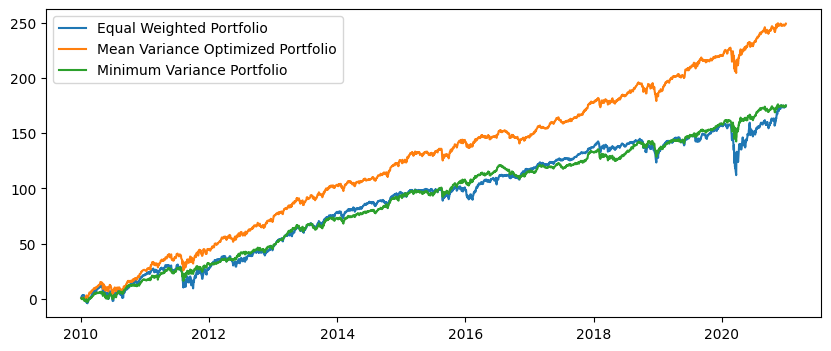

In [157]:
plt.figure(figsize=(10, 4))
plt.plot(df_performance_summary['Trivial'], label='Equal Weighted Portfolio')
plt.plot(df_performance_summary['Markowitz'], label='Mean Variance Optimized Portfolio')
plt.plot(df_performance_summary['Min Variance'], label='Minimum Variance Portfolio')
plt.legend()